# Setting up the Environment and Loading Data 

In [1]:
pip install prince==0.13.1


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\mouho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install -U matplotlib

     ---------------------------------------- 7.8/7.8 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\mouho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\mouho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from ucimlrepo import fetch_ucirepo 
from matplotlib.colors import ListedColormap


# Loading the dataset

**The Heart Disease dataset** from the UCI Machine Learning Repository is a widely used resource for analyzing cardiovascular health data. It comprises information collected from various medical centers, with the Cleveland database, with the goal of predicting the presence of heart disease. Each row represents a patient, and the features capture various health indicators and test results. The target variable (target) indicates whether the patient has heart disease (1) or does not (0).

**Key Features:**

 * Attributes: The complete dataset has 76 attributes, though only 14 are commonly used for predictive modeling.
 * Age: Age of the patient in years.
 * Sex: Gender of the patient (1 = male, 0 = female).
 * cp (Chest Pain Type):
      * 1: Typical angina (chest pain related to decreased blood supply to the heart)
      * 2: Atypical angina
      * 2: Non-anginal pain
      * 3: Asymptomatic (no chest pain)

 * trestbps (Resting Blood Pressure): Resting blood pressure in mm Hg on admission to the hospital.
 * chol (Cholesterol): Serum cholesterol in mg/dL.
 * fbs (Fasting Blood Sugar): Fasting blood sugar > 120 mg/dL (1 = true, 0 = false).
 * restecg (Resting Electrocardiographic Results):
     * 0: Normal
     * 1: ST-T wave abnormality
     * 2: Left ventricular hypertrophy
       
 * thalach (Maximum Heart Rate Achieved): The highest heart rate achieved during exercise testing.
 * exang (Exercise-Induced Angina): Angina induced by exercise (1 = yes, 0 = no).
 * oldpeak (ST Depression): ST depression induced by exercise relative to rest; a measure related to heart stress.
 * slope (Slope of the Peak Exercise ST Segment):
    * 0: Upsloping
    * 1: Flat
    * 2: Downsloping
      
 * ca (Number of Major Vessels Colored by Fluoroscopy): Number of major blood vessels (0-4) colored by fluoroscopy, indicating blockages.
 * thal (Thalassemia):
    * 0: Normal
    * 1: Fixed defect (no blood flow in some part of the heart)
    * 2: Reversible defect (reduced blood flow during exercise but not at rest)

 * Target Variable: Indicates the presence or absence of heart disease, with values ranging from 0 (no presence) to 4 (various levels of presence). For most studies, the target variable is converted to binary:
   * 0: No heart disease
   * 1: Presence of heart disease

In [27]:
  
# fetch dataset 
#dataset=pd.read_csv('./heart.csv',delimiter=',')
  
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
dataset = heart_disease.data.features 
y = heart_disease.data.targets 

y = pd.Series(y.values.flatten())

# Map target values as specified
dataset['target'] = y.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})



# Dataset General Information

In [6]:
#Analyse des premières lignes et des infos générales
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [9]:
#Checking missing values
print("Valeurs manquantes par colonne :\n")
dataset.isnull().sum()

Valeurs manquantes par colonne :



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

**descriptive statistics of the dataset**

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
dataset['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

# Visualisation of the distribition of continuous variables

**Age Distribution**
 * The distribution of individuals without heart disease  is mostly concentrated around the ages of 55 to 65, with a notable peak around 60.
 * There’s a noticeable peak around age 50 to 55 for individuals with heart disease, and this group is generally younger than those without heart disease.
   
This could indicate that age is a significant factor in heart disease, though both groups have overlapping age ranges.


**Cholesterol (chol) Distribution**
 * The cholesterol distribution displays higher cholesterol values for individuals without heart disease (target = 0), with a concentration around 200-250.
 * In contrast, individuals with heart disease have a flatter distribution, with some even reaching very high cholesterol levels over 400.

This may suggest that cholesterol level differences are related to heart disease presence, but the overlap indicates it's not a standalone predictor.



**Oldpeak Distribution**
 * It is highly skewed to the left towards lower values, especially for individuals without heart disease (target = 0).
 * Individuals with heart disease (target = 1) tend to have a wider range of oldpeak values (from 2 to 6), suggesting that higher oldPeak is more common in this group.
This variable could be an important indicator in distinguishing individuals with heart disease, as the target groups show some separation in their distribution.

**Trestbps Distribution**
 * the distribution is centered around 120-140 for both groups, but individuals with heart disease tend to have a slightly higher resting blood pressure on average.
 Trestbs is not a pertinent predictor

**thalach Distribution**

 * People without heart disease (target = 0) tend to have lower values of thalach, peaking around the range of 130–160 bpm.
 * People with heart disease (target = 1) generally have higher values of thalach, with many values above 140 bpm and peaking slightly higher in the 140–160 bpm range.

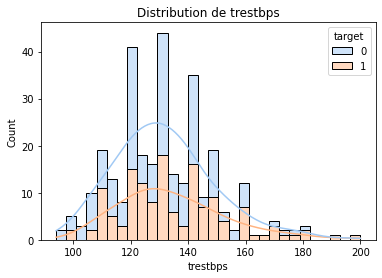

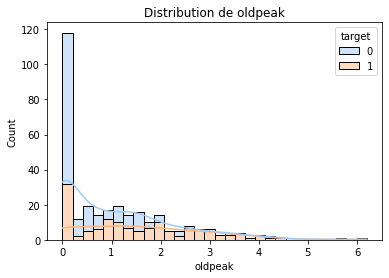

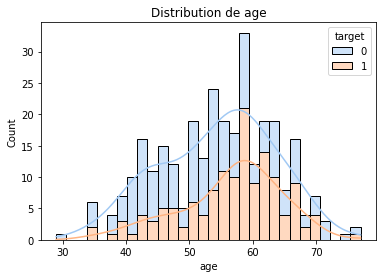

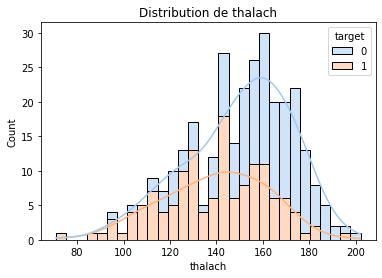

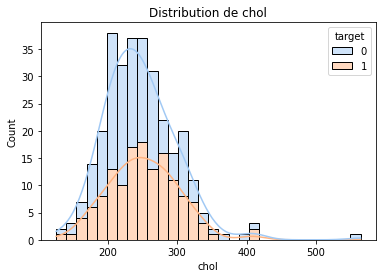

In [12]:

continuous_features = list(set(['age','trestbps','chol','thalach','oldpeak']))

for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=dataset, x=col, hue="target",multiple="stack",palette='pastel', kde=True, bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.show()

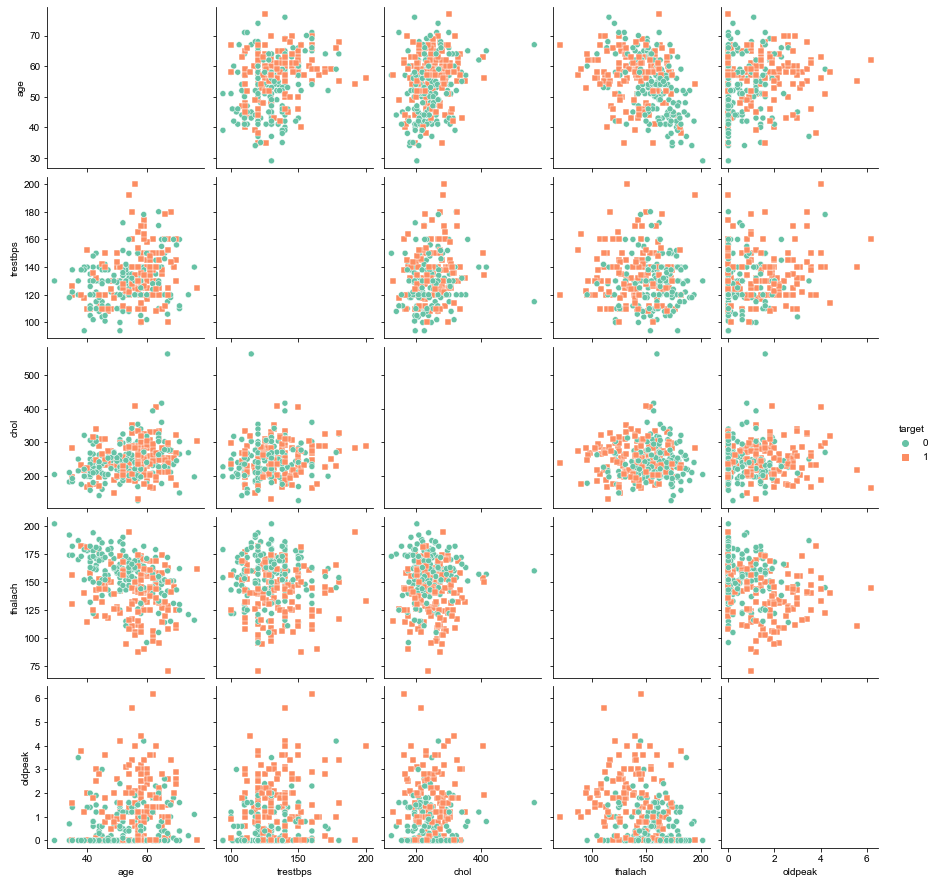

In [13]:
selected_col=['age','trestbps','chol','thalach','oldpeak','target']
sns.pairplot(dataset[selected_col], hue='target',diag_kind='none',palette='Set2', markers=['o','s'])
# parplot: creer des scatter plots pour visualiser les relations entre chaque paire de variables dans le jeu de données.
#hue permet de colorer les points du graphique en fonction des catégories d'une colonne (ici target)
#diag_kind: type de graphique à utiliser pour la diagonale de la matrice 
sns.set(style='ticks')
sns.despine()

# Visualization of the distribution of the categorical variables



**Distribution of ca by Presence of Heart Disease**

 * For patients with heart disease (target = 1), most have ca = 0, meaning they have no major vessels blocked or colored by fluoroscopy. As ca values increase (indicating more blocked vessels), the count of patients with heart disease decreases significantly.

**Distribution of cp by Presence of Heart Disease**
The chest pain type (cp) varies noticeably between the two groups:
 * cp = 0 (typical angina) is much more common in patients without heart disease (target = 0).
 * cp = 1, cp = 2, and cp = 3 are more common in patients with heart disease (target = 1), especially cp = 2.

 Higher values of cp are associated with a higher likelihood of heart disease, while lower cp values are more common in patients without heart disease.
 
 
**Distribution of exang by Presence of Heart Disease**

 * Exercise-induced angina (exang = 1) seems to be more common among individuals without heart disease. This might suggest that, within this sample, exang alone does not strongly indicate the presence of heart disease.
 * However, individuals with exang = 0, (the patient experiences chest pain during exercise) have a higher likelihood of heart disease compared to those with exang = 1

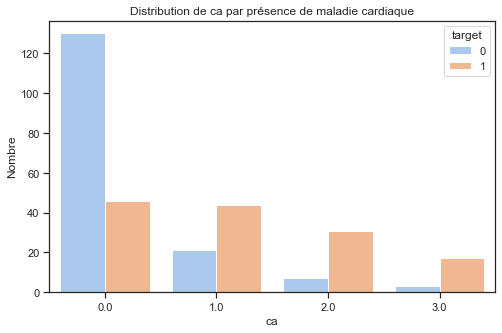

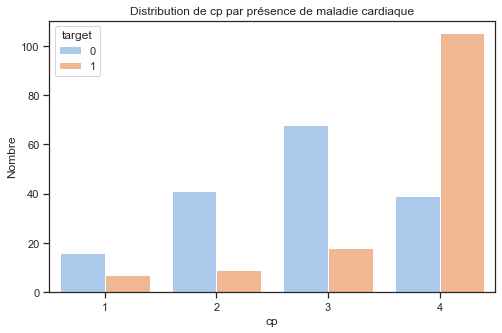

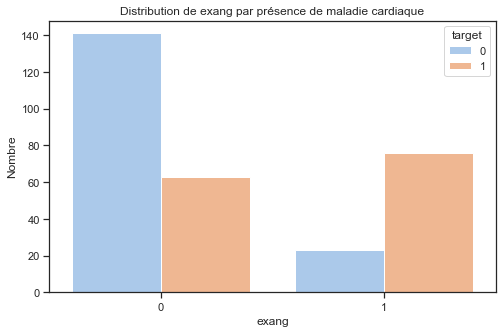

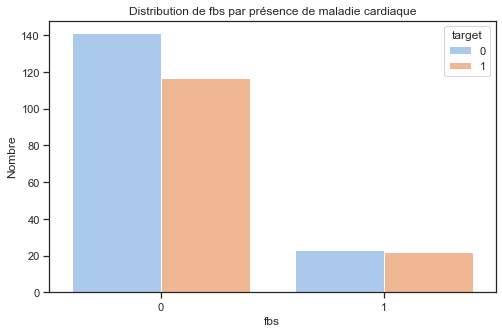

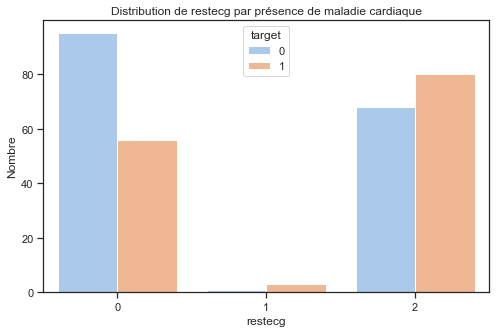

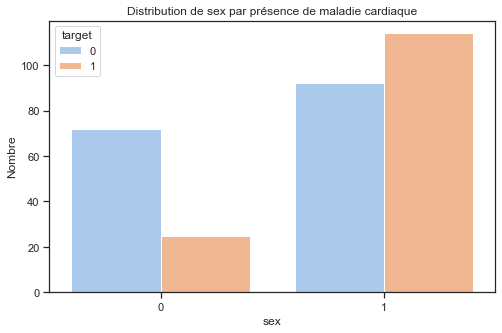

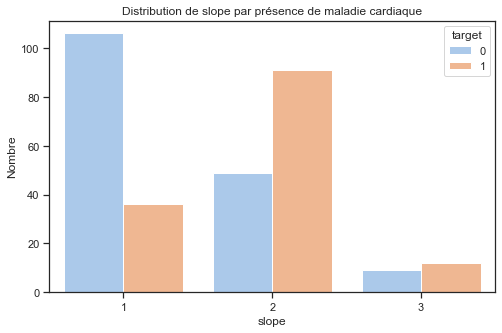

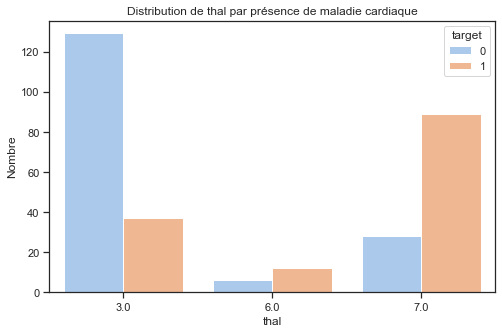

In [14]:
# Create the list of categorical features for further use in prepare charts

categorical_features = list(set(dataset.columns) -set(continuous_features)-set(['target']))
categorical_features.sort()


for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataset, x=col, hue='target',palette='pastel')
    plt.title(f'Distribution de {col} par présence de maladie cardiaque')
    plt.xlabel(col)
    plt.ylabel('Nombre')
    plt.show()


**Confusion Matrix**

The correlation matrix provides insights into the relationships between different variables in the heart disease dataset:

**Target Correlations:**

 * The target variable has the highest positive correlation with cp (chest pain type) at **0.43** and thalach (maximum heart rate achieved) at **0.42**.
 * It shows moderate negative correlations with exang (exercise-induced angina) at **-0.44**, oldpeak (ST depression induced by exercise) at **-0.43**, and ca (number of major vessels) at -0.39. These suggest that lower exang, oldpeak, and ca values may indicate a higher probability of heart disease presence in this dataset.

**Strong Positive Correlations Between Features**
* **slope** and **cp** have a correlation of **0.39**, indicating that the slope of the peak exercise ST segment is somewhat related to the type of chest pain experienced.


**Negative Correlations**

  * **thalach** has a moderate negative correlation with **age** at **-0.40** and with **exang** at **-0.38**. Older individuals or those who experience exercise-induced angina tend to have lower maximum heart rates.
 
  * **oldpeak** and **slope** have a negative correlation (-0.58),so a higher oldpeak is associated with a less steep, a flatter slope during exercise can be a sign of heart stress or problems.


**Conclusion**
   * For PCA, focusing on variables with higher correlations (either positive or negative) with the **target** variable may enhance interpretability, these features are likely more important in predicting heart disease.
     
   * Features like **cp**, **thalach**, **exang**, **oldpeak**, **ca**, and **slope** may play a more significant role in forming principal components, as they explain more of the variance related to the presence of heart disease. 
     at correlated features.

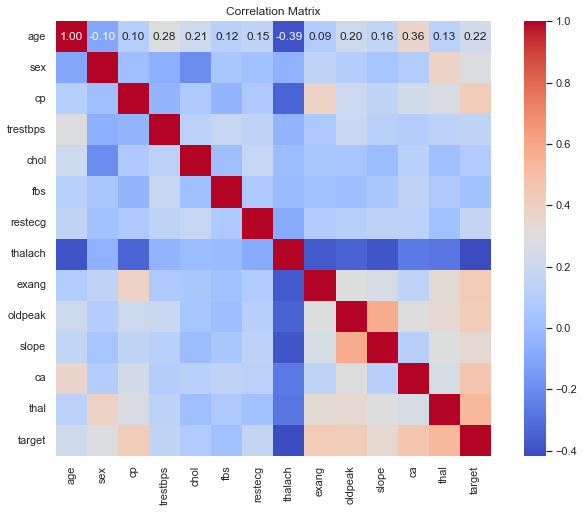

In [28]:
plt.figure(figsize=(12, 8))

# Heatmap of the correlation matrix
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Title
plt.title('Correlation Matrix')
plt.show()

# Performing PCA using prince

In [16]:

# Shuffle the dataset
dataset = shuffle(dataset, random_state=42).reset_index(drop=True)


In [17]:
import prince

pca = prince.PCA(
n_components=4,
n_iter=3,
rescale_with_mean=True,
rescale_with_std=True,
copy=True,
check_input=True,#si il ya des valeurs manquantes et toutes les valeurs sont numériques
engine='sklearn',
random_state=42
)


In [18]:
#ACP  attend QUE des valeurs numériques.
# Sélectionner uniquement les colonnes numériques
continuous_data = dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
pca=pca.fit(continuous_data)#mat covariance

In [19]:
X_pca=pca.transform(continuous_data)
X_pca['target'] = dataset['target'].values 
X_pca['ID']= dataset.index
print(X_pca.head())

component         0         1         2         3  target  ID
0          1.066557  0.712002 -0.074817 -0.386126       0   0
1          0.188471 -1.661341  1.238821 -1.073858       1   1
2         -0.152173 -0.274924  0.377496  0.040235       1   2
3          1.043863 -0.499595  1.359892 -0.588237       1   3
4         -0.251013  0.485207  0.674019  0.697627       1   4


In [20]:
explained_variance = pca.eigenvalues_
percentage_variance = pca.percentage_of_variance_
cumulative_variance = np.cumsum(percentage_variance)

print("Explained variance by each component:", explained_variance)
print("Explained variance by each component", percentage_variance)
print("cumulative_variance",cumulative_variance )

Explained variance by each component: [1.79719268 1.09120586 0.87461996 0.76274233]
Explained variance by each component [35.94385368 21.82411727 17.49239915 15.25484663]
cumulative_variance [35.94385368 57.76797095 75.2603701  90.51521673]


**Analysis of the plot:**

 * The Scree Plot shows a line representing the explained variance by each principal component. The first component (PC1) explains 36.13% of the total variance in the dataset. The second component (PC2) explains 21.55%, and the third component (PC3) explains 17.67%. Together, these three components account for approximately 75.35% of the total variance.

 * The fourth component (PC4) captures only 15.18% of the variance and adds less significant information compared to the first three components.

 * Retaining the first three components (PC1, PC2, and PC3) represents a good choice for dimensionality reduction, as they explain 75.35% of the variance without losing much information.



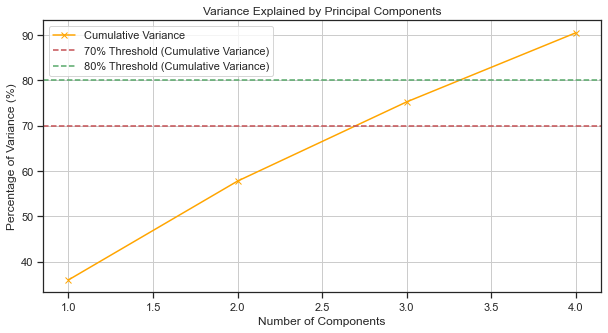

In [21]:
# Plot the Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='x', linestyle='-', color='orange', label='Cumulative Variance')
plt.axhline(y=70, color='r', linestyle='--', label="70% Threshold (Cumulative Variance)")
plt.axhline(y=80, color='g', linestyle='--', label="80% Threshold (Cumulative Variance)")
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance (%)')
plt.legend()
plt.grid()
plt.show()


# Visualization using Scree Plot

* The Scree Plot shows a line representing the explained variance by each principal component.
 

**Analysis of the Scree Plot:**


 * The Scree Plot displays the explained variance values for each principal component. The first component (PC1) has an explained variance of 1.8066, which represents the highest value and indicates it captures a significant portion of the information in the dataset. The second component (PC2) has an explained variance of 1.0775, and the third component (PC3) has an explained variance of 0.8834. Together, these three components account for a total explained variance of approximately 3.7675.

 * The fourth component (PC4) has an explained variance of 0.7592, indicating it contributes less to the overall information captured compared to the first three components.

 * Retaining the first three components (PC1, PC2, and PC3) is a good strategy for dimensionality reduction, as they account for the majority of the explained variance, while the fourth component adds minimal additional value.

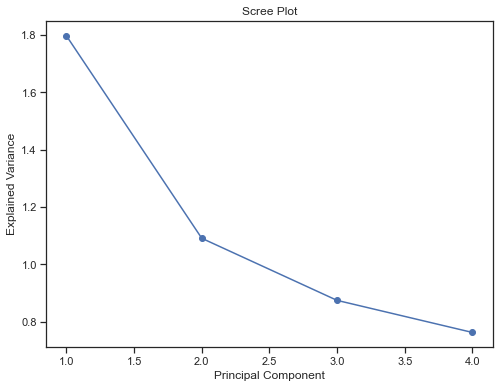

In [22]:


plt.figure(figsize=(8,6))
plt.plot(range(1,len(pca.eigenvalues_)+1),pca.eigenvalues_,marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

# Visualization using a correlation circle

* The x-axis represents PC1, and the y-axis represents PC2. These are the first two principal components and they account for most of the variance in the dataset

* Variables that are close to each other like **chol** and **trestbps**, are positively correlated, meaning these variables tend to increase or decrease together.
* **thalach** et  **oldpeak** are on the opposite sides of the plot, are negatively correlated, suggesting that as one increases, the other tends to decrease.
* **thalach** and **oldpeak** have a an angle about 90deg in the PCA plot, indicating a strong inverse relationship in the context of the principal components.

**Conclusion**

* **chol** and **thalach** are likely to be the most influential variables in explaining variance in the heart disease data.
* **Oldpeak** shows an inverse relationship with these main patterns, which could signify that it behaves differently compared to risk factors like **chol** and **trestbps**.

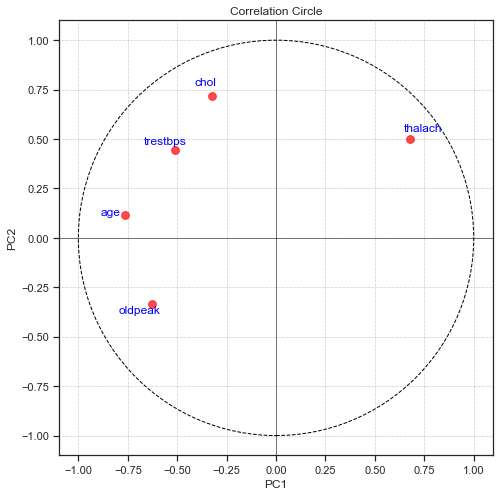

In [23]:

# Extract the first two components from column_correlations for plotting
correlations_2d = pca.column_correlations.iloc[:, :2].values

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot each variable as a point and add a label for clarity
for i, (x, y) in enumerate(correlations_2d):
    ax.scatter(x, y, color="red", alpha=0.7, s=60)  # Scatter plot for points
    ax.text(x * 1.1, y * 1.1, continuous_data.columns[i], fontsize=12, ha='center', va='center', color="blue")

# Add the unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1)
ax.add_artist(circle)

# Set the x and y limits slightly beyond -1 and 1 for padding
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# Add axis lines for x and y
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Correlation Circle')

# Optional: Add grid and equal aspect ratio
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()

**A biplot** combines information about both the samples (data points) and features (arrows) on the same plane. The samples are plotted along the principal components, and the arrows represent the contribution of each original feature to these components.

* The **red** and **green** points, representing two classes (the presence or absence of a heart disease) that overlap significantly. This suggests that the first two principal components alone don’t clearly distinguish between the classes.

* Tonger arrows like for **cp** and **sex** indicate that these features strongly influence the principal components, meaning they contribute more to the variation captured in PC1 and PC2, the two features are pointed to the same direction these features may be positively correlated.

* Shorter arrows like **trestbps** and **chol** imply a weaker influence on the first two components, so they contribute less to the separation observed in this 2D plot.

  


# Visualization using a Biplot

C:\Users\mouho\AppData\Local\Temp\ipykernel_30468\58356241.py:30: UserWarning: Adding colorbar to a different Figure <Figure size 576x576 with 2 Axes> than <Figure size 864x576 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Target')


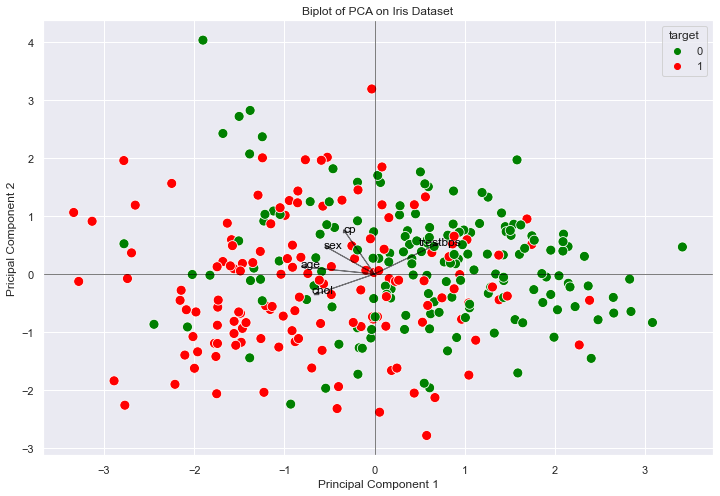

In [24]:
# Define the first two principal components
pc1 = X_pca[0]  # Replace 'PC1' with the actual name of the first component in X_pca
pc2 = X_pca[1]  # Replace 'PC2' with the actual name of the second component in X_pca


# Scatter plot of the PCA results

loadings=pca.column_correlations

sns.set(style="darkgrid")

plt.figure(figsize=(12,8))

sns.scatterplot(
    x=X_pca[0], y=X_pca[1],
    hue=X_pca['target'],
    palette=['green','red'],
    s=100
)

for i in range(X_pca.shape[0]):
        X_pca[0].iloc[i]+0.02,
        X_pca[1].iloc[i],
        fontsize=9
    


# Plot the scores (data points)
scatter = ax.scatter(pc1, pc2, c=dataset['target'], cmap='viridis', edgecolor='k', alpha=0.6)
plt.colorbar(scatter, label='Target')

for i in range(loadings.shape[0]):
    plt.arrow(0,0,loadings.iloc[i,0],loadings.iloc[i,1],
                color='black', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(loadings.iloc[i,0]+0.05, loadings.iloc[i,1]+0.05,
             dataset.columns[i], color='black', ha='center', va='center', fontsize=12)


plt.title('Biplot of PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Pricipal Component 2')
plt.grid(True)
plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.show()

In [25]:
pca_df = pd.DataFrame(data=X_pca)
pca_df

component,0,1,2,3,target,ID
0,1.066557,0.712002,-0.074817,-0.386126,0,0
1,0.188471,-1.661341,1.238821,-1.073858,1,1
2,-0.152173,-0.274924,0.377496,0.040235,1,2
3,1.043863,-0.499595,1.359892,-0.588237,1,3
4,-0.251013,0.485207,0.674019,0.697627,1,4
...,...,...,...,...,...,...
298,-0.030782,3.185912,-2.550422,-0.494511,1,298
299,-0.045447,0.605851,0.592287,-1.037740,1,299
300,0.549547,-0.117322,-0.935466,-1.417251,1,300
301,-1.012356,-0.725258,-0.638094,-0.291883,1,301


* This plot represents a 3D PCA biplot, representing 3 principal components (PC1, PC2, and PC3), which allows for a more comprehensive view of the data structure.


* The yellow and purple points, representing the two classes, show slightly more separation than in the 2D plot. However, there is still significant overlap, indicating that even three principal components may not fully separate the classes.

* the features **cp**, **sex**, and **age** continue to have relatively longer arrows, meaning they strongly contribute to the variation captured in the first three components.

* The alignment of arrows, such as **cp** and **sex**, shows they are still likely correlated.


Adding a third component reveals some structure in the data that wasn’t visible in 2D, though the overlap suggests that these components alone may still not capture all the variability needed for a clear classification.

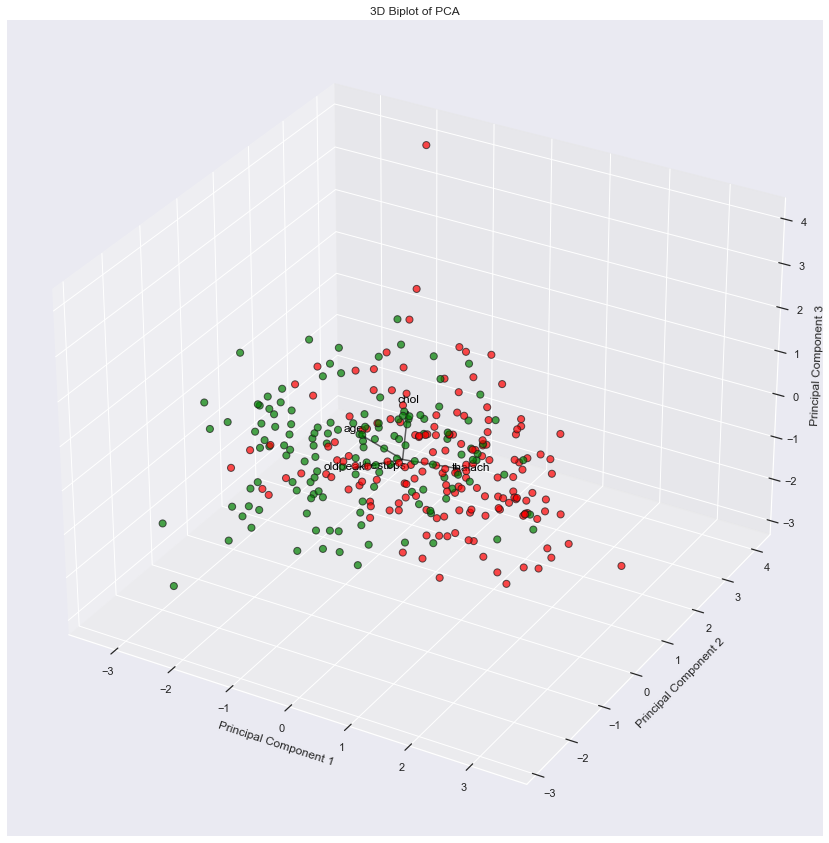

In [26]:


# Create a 3D figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the observations, colored by target variable
scatter = ax.scatter(
    X_pca[0], X_pca[1], X_pca[2],
    c=dataset['target'], cmap= ListedColormap(['red', 'green']), edgecolor='k', s=50, alpha=0.7
)

# Plot  arrows and add var names
for i in range(loadings.shape[0]):
    ax.quiver(
        0, 0, 0,
        loadings.iloc[i, 0], loadings.iloc[i, 1], loadings.iloc[i, 2],
        color='black', alpha=0.6, arrow_length_ratio=0.1
    )
    ax.text(
        loadings.iloc[i, 0]*1.2, loadings.iloc[i, 1]*1.2, loadings.iloc[i, 2]*1.2,
        loadings.index[i], color='black', ha='center', fontsize=12
    )

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Biplot of PCA')

# Show plot
plt.show()

# PCA Discussion

In this dataset, PCA effectively reduces dimensionality and captures major data patterns but has limitations in separating classes and interpretability. It provides useful insights but may need to be combined with other techniques for better classification results.


**Strengths of PCA in This Dataset**

 * Dimensionality Reduction: PCA reduces the dataset to a few components, with three components capturing 75.26% of the variance. This simplifies the data while retaining most information.
   
 * Data Visualization: The 2D and 3D biplots make it easier to visualize patterns and relationships between features.

 * Noise Reduction: By focusing on components with high variance, PCA may help reduce noise from less important features, potentially enhancing downstream analysis.
   
**Weaknesses of PCA in This Dataset**

 * Limited Class Separation: The overlap in the 2D and 3D plots shows that PCA does not clearly separate the heart disease classes, which limits its effectiveness for classification.

 * Linear Assumption: PCA assumes linear relationships and may miss complex, nonlinear interactions between features that could be relevant to heart disease classification.